# Face Detection with Haar Cascades

**Note: This is face *detection* NOT face *recognition*. We are only detecting if a face is in an image, not who the face actually is. That requires deep learning which we'll go over later!**

In [1]:
import numpy as np

import matplotlib.pyplot as plt

import cv2 

## Images

In [2]:
waterfall = cv2.imread('photos/waterfall.jpeg' , 0) # 0 is helping to get gray scale rather than RGB images.
xalo = cv2.imread('photos/xalo.jpeg' , 0)
chess = cv2.imread('photos/chess.jpeg' , 0)
with_girls = cv2.imread('photos/girls.jpeg' , 0)

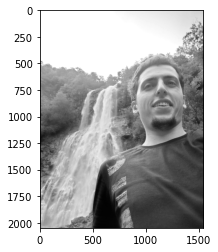

In [3]:
plt.imshow(waterfall , cmap = 'gray' ); # Even if image is not RGB. We still need to cmap = 'gray' for see gray photos.

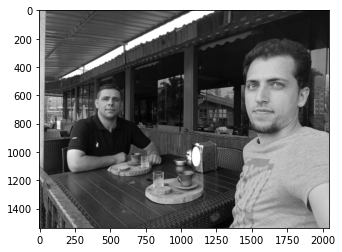

In [4]:
plt.imshow(xalo , cmap = 'gray');

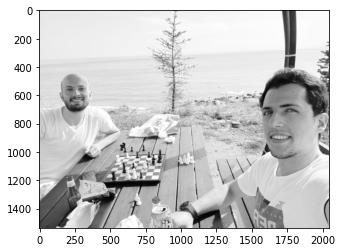

In [5]:
plt.imshow(chess , cmap = 'gray');

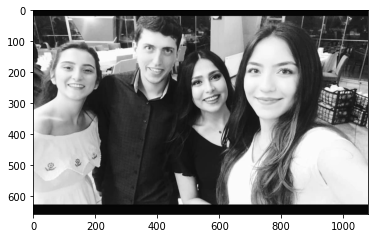

In [6]:
plt.imshow(with_girls , cmap = 'gray');

## Cascade Files

OpenCV comes with these pre-trained cascade files, we've relocated the .xml files for you in our own DATA folder.

## Face Detection

In [7]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

In [8]:
# face_cascade.detectMultiScale(chess)

In [9]:
# face_cascade.detectMultiScale(chess).shape

In [10]:
# plt.imshow(face_cascade.detectMultiScale(chess));

In [11]:
def detect_face(img):
  
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img) 
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

In [12]:
chess_face = detect_face(chess)

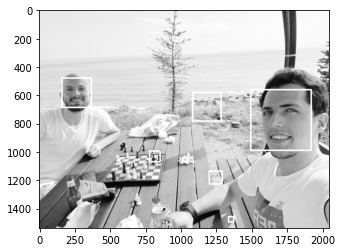

In [13]:
plt.imshow(chess_face , cmap = 'gray'); # Actually not good working.

In [14]:
xalo_face = detect_face(xalo)

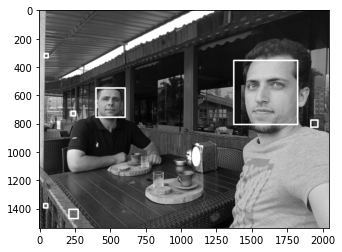

In [15]:
plt.imshow(xalo_face , cmap = 'gray'); # Working but not cool.

In [16]:
waterfall_face = detect_face(waterfall)

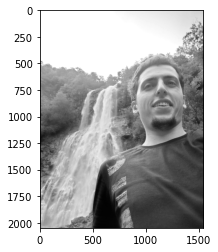

In [17]:
plt.imshow(waterfall , cmap = 'gray'); # Can't found the face.

In [18]:
with_girls_face = detect_face(with_girls)

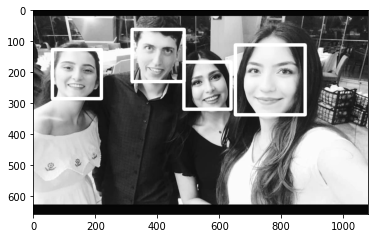

In [19]:
plt.imshow(with_girls_face , cmap = 'gray'); # Only this was good.

In [20]:
def adj_detect_face(img):
    
    face_img = img.copy()
  
    face_rects = face_cascade.detectMultiScale(face_img,scaleFactor = 1.2, minNeighbors = 5) # Only differences are scaleFactor and minNeighbors parameters.
    
    for (x,y,w,h) in face_rects: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img


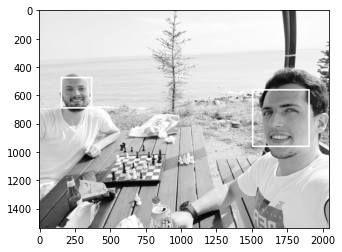

In [21]:
result = adj_detect_face(chess)
plt.imshow(result,cmap = 'gray'); # Now better.

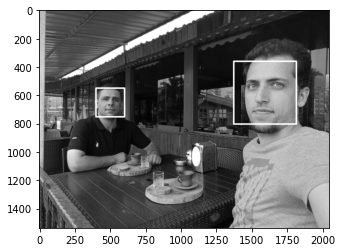

In [22]:
result = adj_detect_face(xalo)
plt.imshow(result,cmap = 'gray'); # Now better.

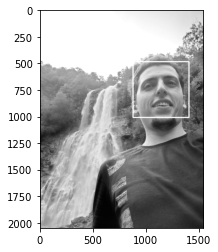

In [23]:
result = adj_detect_face(waterfall)
plt.imshow(result,cmap = 'gray'); # Whoaaa catched it now. Good...

## Eye Cascade File

In [24]:
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

In [25]:
def detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

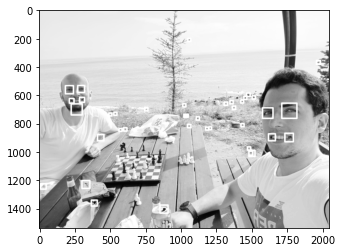

In [26]:
chess_eye = detect_eyes(chess)
plt.imshow(chess_eye , cmap = 'gray'); # Wrong too much.

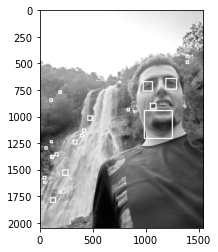

In [27]:
waterfall_eye = detect_eyes(waterfall)
plt.imshow(waterfall_eye , cmap = 'gray'); # Too bad.

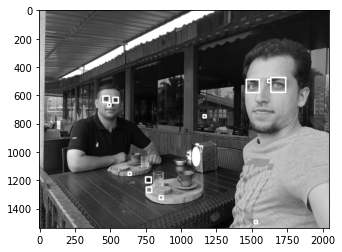

In [28]:
xalo_eye = detect_eyes(xalo)
plt.imshow(xalo_eye , cmap = 'gray'); # Its not too bad but still bad.

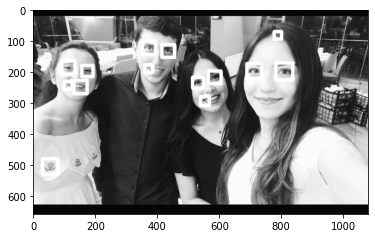

In [29]:
with_girls_eye = detect_eyes(with_girls)
plt.imshow(with_girls_eye , cmap = 'gray'); # Not too bad but bad.

In [30]:
def adj_detect_eyes(img):
    
    face_img = img.copy()
  
    eyes = eye_cascade.detectMultiScale(face_img , scaleFactor = 1.3 , minNeighbors = 5) 
    
    
    for (x,y,w,h) in eyes: 
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10) 
        
    return face_img
    

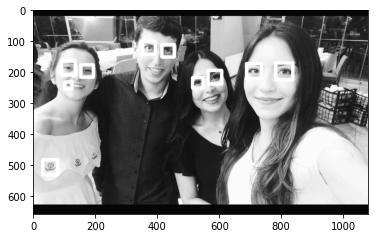

In [31]:
results = adj_detect_eyes(with_girls)
plt.imshow(results , cmap = 'gray'); # Now better but not proper.

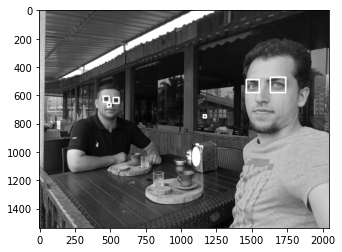

In [32]:
results = adj_detect_eyes(xalo)
plt.imshow(results , cmap = 'gray'); # Better but not fully OK.

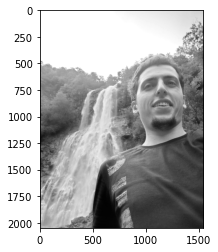

In [33]:
results = adj_detect_eyes(waterfall)
plt.imshow(results , cmap = 'gray');  # Still can't dedect.

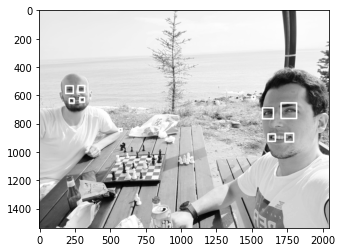

In [34]:
results = adj_detect_eyes(chess)
plt.imshow(results , cmap = 'gray');  # Still not good.

In [35]:
# Done for now but Haarscades not working too good...

## Conjunction with Video

In [36]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_face(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

In [37]:
cap = cv2.VideoCapture(0) 

while True: 
    
    ret, frame = cap.read(0) 
     
    frame = detect_eyes(frame)
 
    cv2.imshow('Video Face Detection', frame) 
 
    c = cv2.waitKey(1) 
    if c == 27: 
        break 
        
cap.release() 
cv2.destroyAllWindows()

In [ ]:
# Done